In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [55]:
data = '''
# n_mol          AFQMC/HF                AFQMC/CID               AFQMC/CCD_PT
    1      -1.093575 +/- 0.000209  -1.096072 +/- 0.00000   -1.096142 +/- 0.000021
    4      -4.374142 +/- 0.000813   -4.3838 +/- 0.0003      -4.384514 +/- 0.000184
    8      -8.747798 +/- 0.001101   -8.7665 +/- 0.0003      -8.769336 +/- 0.000316
    16     -17.497935 +/- 0.001732  -17.5296 +/- 0.0008     -17.538774 +/- 0.001064
    32     -34.994006 +/- 0.001875  -35.051 +/- 0.002       -35.077183 +/- 0.001844
    50     -54.689181 +/- 0.002731  -54.758 +/- 0.004       -54.806776 +/- 0.003418
'''

In [56]:
n = []
afqmc_hf = []
afqmc_ci = []
afqmc_pt = []
afqmc_hf_err = []
afqmc_ci_err = []
afqmc_pt_err = []
for lines in data.splitlines():
    if not lines.startswith('#') and len(lines) > 0:
        parts = lines.split()
        n = np.hstack((n,int(parts[0])))
        afqmc_hf = np.hstack((afqmc_hf,float(parts[1])/int(parts[0])))
        afqmc_hf_err = np.hstack((afqmc_hf_err,float(parts[3])/int(parts[0])))
        afqmc_ci = np.hstack((afqmc_ci,float(parts[4])/int(parts[0])))
        afqmc_ci_err = np.hstack((afqmc_ci_err,float(parts[6])/int(parts[0])))
        afqmc_pt = np.hstack((afqmc_pt,float(parts[7])/int(parts[0])))
        afqmc_pt_err = np.hstack((afqmc_pt_err,float(parts[9])/int(parts[0])))

ref = np.array([-1.096072]*len(n))

In [57]:
print('  N   \t    CCD \t \t  AFQMC/HF \t \t AFQMC/CID \t \t AFQMC/CCD_PT')
for i,m in enumerate(n):
    print(f"  {int(m)} \t {ref[i]:.6f} \t {afqmc_hf[i]:.6f} +/- {afqmc_hf_err[i]:.6f} \t {afqmc_ci[i]:.6f} +/- {afqmc_ci_err[i]:.6f} \t {afqmc_pt[i]:.6f} +/- {afqmc_pt_err[i]:.6f}")

  N   	    CCD 	 	  AFQMC/HF 	 	 AFQMC/CID 	 	 AFQMC/CCD_PT
  1 	 -1.096072 	 -1.093575 +/- 0.000209 	 -1.096072 +/- 0.000000 	 -1.096142 +/- 0.000021
  4 	 -1.096072 	 -1.093535 +/- 0.000203 	 -1.095950 +/- 0.000075 	 -1.096129 +/- 0.000046
  8 	 -1.096072 	 -1.093475 +/- 0.000138 	 -1.095813 +/- 0.000037 	 -1.096167 +/- 0.000039
  16 	 -1.096072 	 -1.093621 +/- 0.000108 	 -1.095600 +/- 0.000050 	 -1.096173 +/- 0.000067
  32 	 -1.096072 	 -1.093563 +/- 0.000059 	 -1.095344 +/- 0.000063 	 -1.096162 +/- 0.000058
  50 	 -1.096072 	 -1.093784 +/- 0.000055 	 -1.095160 +/- 0.000080 	 -1.096136 +/- 0.000068


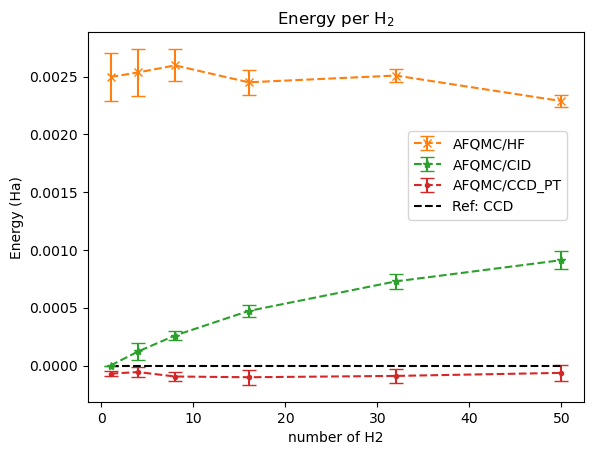

In [77]:
plt.errorbar(n,afqmc_hf-ref,yerr=afqmc_hf_err,fmt='x--', capsize=5, color='C1', label='AFQMC/HF')
plt.errorbar(n,afqmc_ci-ref,yerr=afqmc_ci_err,fmt='*--', capsize=5, color='C2', label='AFQMC/CID')
plt.errorbar(n,afqmc_pt-ref,yerr=afqmc_pt_err,fmt='.--', capsize=5, color='C3', label='AFQMC/CCD_PT')
plt.plot(n,ref-ref,'--',color='black', label='Ref: CCD')
plt.xlabel('number of H2')
plt.ylabel('Energy (Ha)')
plt.title('Energy per H$_2$')
handles, labels = plt.gca().get_legend_handles_labels()
order = ['AFQMC/HF', 'AFQMC/CID', 'AFQMC/CCD_PT', 'Ref: CCD']
ordered_handles = [handles[labels.index(l)] for l in order]
ordered_labels = order
plt.legend(ordered_handles, ordered_labels, bbox_to_anchor=(0.98, 0.75), loc='upper right')
plt.show()